In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import requests
import psycopg2
#import config as creds

# Connect to  MongoDB using pandas


## Step 1: Data Exploration


* Check the dataset
* check the missing values and duplicates
* check the columns
* check the types
* check the shape

In [42]:

# Import our input dataset
airbnb_df = pd.read_csv('Resources/airbnb_cleansed_df.csv')
airbnb_df.head(10)

,_id,id,listing_url,host_response_rate,host_acceptance_rate,host_picture_url,street,neighbourhood_cleansed,latitude,longtitude,...,pool,hair_dryer,gym,wheelchair_accessible,iron,shampoo,hangers,first_aid_kit,elevator,comments
0,60f9849930e6339dfd92b1b8,13624476,https://www.airbnb.com/rooms/13624476,100,100,https://a2.muscache.com/im/pictures/85546a19-c...,"Commercial Street, Boston, MA 02109, United St...",North End,42.366226,-71.052250,...,0,0,0,0,0,0,0,0,0,NaN
1,60f9849930e6339dfd92b1a7,1692573,https://www.airbnb.com/rooms/1692573,100,100,https://a2.muscache.com/im/users/8814724/profi...,"Greenough Avenue, Boston, MA 02130, United States",Jamaica Plain,42.313379,-71.117189,...,0,0,0,0,0,1,0,0,0,My sister and I ( 30) stayed with our elderly ...
2,60f9849930e6339dfd92b1c4,14873100,https://www.airbnb.com/rooms/14873100,92,100,https://a0.muscache.com/im/users/26098645/prof...,"Dexter Street, Boston, MA 02127, United States",South Boston,42.331079,-71.056957,...,0,0,0,0,0,1,1,0,0,NaN
3,60f9849930e6339dfd92b1cb,5867761,https://www.airbnb.com/rooms/5867761,0,0,https://a2.muscache.com/im/pictures/f3de98b7-f...,"Union Park Street, Boston, MA 02118, United St...",South End,42.343106,-71.068970,...,0,0,0,0,0,0,0,0,0,NaN
4,60f9849930e6339dfd92b1da,1321422,https://www.airbnb.com/rooms/1321422,100,100,https://a2.muscache.com/im/users/6608084/profi...,"Savin Hill Avenue, Dorchester, MA 02125, Unite...",Dorchester,42.308380,-71.046943,...,0,0,0,0,0,1,0,1,0,Barney met U.S. and showed us around the entir...
5,60f9849930e6339dfd92b1e2,7225201,https://www.airbnb.com/rooms/7225201,100,82,https://a1.muscache.com/im/users/845174/profil...,"A St, Boston, MA 02210, United States",South Boston Waterfront,42.347880,-71.049656,...,0,0,1,0,0,1,0,0,1,"Great host, comfortable bed, location is perfect"
6,60f9849930e6339dfd92b1f5,3353,https://www.airbnb.com/rooms/3353,90,78,https://a2.muscache.com/im/users/4240/profile_...,"Gardner St, Allston, MA 02134, United States",Allston,42.355017,-71.127590,...,0,0,0,0,0,0,0,0,0,"Stay exceeded my expectations. Great location,..."
7,60f9849930e6339dfd92b201,31796,https://www.airbnb.com/rooms/31796,100,100,https://a2.muscache.com/im/users/119019/profil...,"Park St, Dorchester, MA 02122, United States",Dorchester,42.299773,-71.060476,...,0,0,0,0,0,1,0,1,0,Listing erred in that on site parking is in qu...
8,60f9849930e6339dfd92b20d,197972,https://www.airbnb.com/rooms/197972,100,100,https://a2.muscache.com/im/users/965697/profil...,"Spring Park Ave, Boston, MA 02130, United States",Jamaica Plain,42.317321,-71.108338,...,0,1,0,0,1,1,1,1,0,"Excelente ,todo bien ,a pesar de la distancia ..."
9,60f9849930e6339dfd92b230,629814,https://www.airbnb.com/rooms/629814,100,92,https://a0.muscache.com/im/users/3129367/profi...,"Marbury Terrace, Boston, MA 02130, United States",Jamaica Plain,42.316866,-71.102544,...,0,1,1,0,1,1,1,1,0,My adult daughter and I just spent a week in t...


In [43]:
airbnb_df = airbnb_df.drop(airbnb_df.columns[0], axis=1)

In [44]:
airbnb_df.dtypes

id                          int64
listing_url                object
host_response_rate          int64
host_acceptance_rate        int64
host_picture_url           object
street                     object
neighbourhood_cleansed     object
latitude                  float64
longtitude                float64
property_type              object
room_type                  object
accomodates                 int64
bathrooms                 float64
bedrooms                    int64
beds                        int64
bed_type                   object
price                       int64
security_deposit            int64
cleaning_fee                int64
extra_people                int64
number_of_reviews           int64
review_scores_rating        int64
cancellation_policy        object
wireless_internet           int64
smoke_detector              int64
air_conditioning            int64
heating                     int64
cable_tv                    int64
washer                      int64
dryer         

In [45]:
print(airbnb_df.columns)


Index(['id', 'listing_url', 'host_response_rate', 'host_acceptance_rate',
       'host_picture_url', 'street', 'neighbourhood_cleansed', 'latitude',
       'longtitude', 'property_type', 'room_type', 'accomodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'price', 'security_deposit',
       'cleaning_fee', 'extra_people', 'number_of_reviews',
       'review_scores_rating', 'cancellation_policy', 'wireless_internet',
       'smoke_detector', 'air_conditioning', 'heating', 'cable_tv', 'washer',
       'dryer', 'family_kid_friendly', 'kitchen', 'free_parking',
       'carbon_monoxide', 'pets_allowed', 'essentials', 'checkin_24hr',
       'lock_on_bedroom_door', 'pool', 'hair_dryer', 'gym',
       'wheelchair_accessible', 'iron', 'shampoo', 'hangers', 'first_aid_kit',
       'elevator', 'comments'],
      dtype='object')


In [47]:
airbnb_df.columns = ['id', 'listing_url', 'host_response_rate', 'host_acceptance_rate',
       'host_picture_url', 'street', 'neighbourhood_cleansed', 'latitude',
       'longtitude', 'property_type', 'room_type', 'accomodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'price', 'security_deposit',
       'cleaning_fee', 'extra_people', 'number_of_reviews',
       'review_scores_rating', 'cancellation_policy', 'wireless_internet',
       'smoke_detector', 'air_conditioning', 'heating', 'cable_tv', 'washer',
       'dryer', 'family_kid_friendly', 'kitchen', 'free_parking',
       'carbon_monoxide', 'pets_allowed', 'essentials', 'checkin_24hr',
       'lock_on_bedroom_door', 'pool', 'hair_dryer', 'gym',
       'wheelchair_accessible', 'iron', 'shampoo', 'hangers', 'first_aid_kit',
       'elevator', 'comments']
airbnb_df.head(5)

,id,listing_url,host_response_rate,host_acceptance_rate,host_picture_url,street,neighbourhood_cleansed,latitude,longtitude,property_type,...,pool,hair_dryer,gym,wheelchair_accessible,iron,shampoo,hangers,first_aid_kit,elevator,comments
0,13624476,https://www.airbnb.com/rooms/13624476,100,100,https://a2.muscache.com/im/pictures/85546a19-c...,"Commercial Street, Boston, MA 02109, United St...",North End,42.366226,-71.052250,Condominium,...,0,0,0,0,0,0,0,0,0,NaN
1,1692573,https://www.airbnb.com/rooms/1692573,100,100,https://a2.muscache.com/im/users/8814724/profi...,"Greenough Avenue, Boston, MA 02130, United States",Jamaica Plain,42.313379,-71.117189,House,...,0,0,0,0,0,1,0,0,0,My sister and I ( 30) stayed with our elderly ...
2,14873100,https://www.airbnb.com/rooms/14873100,92,100,https://a0.muscache.com/im/users/26098645/prof...,"Dexter Street, Boston, MA 02127, United States",South Boston,42.331079,-71.056957,House,...,0,0,0,0,0,1,1,0,0,NaN
3,5867761,https://www.airbnb.com/rooms/5867761,0,0,https://a2.muscache.com/im/pictures/f3de98b7-f...,"Union Park Street, Boston, MA 02118, United St...",South End,42.343106,-71.068970,Apartment,...,0,0,0,0,0,0,0,0,0,NaN
4,1321422,https://www.airbnb.com/rooms/1321422,100,100,https://a2.muscache.com/im/users/6608084/profi...,"Savin Hill Avenue, Dorchester, MA 02125, Unite...",Dorchester,42.308380,-71.046943,House,...,0,0,0,0,0,1,0,1,0,Barney met U.S. and showed us around the entir...


#### Data Explorarion Summary:



* There are multiple types of features, both categorical and numerical
* Tratget is numerical
* There are missing values in the dataset

## Step 2: Feature Selection:

* Use heatmap to identify features that are most correlated to the Sales Price


<AxesSubplot:>

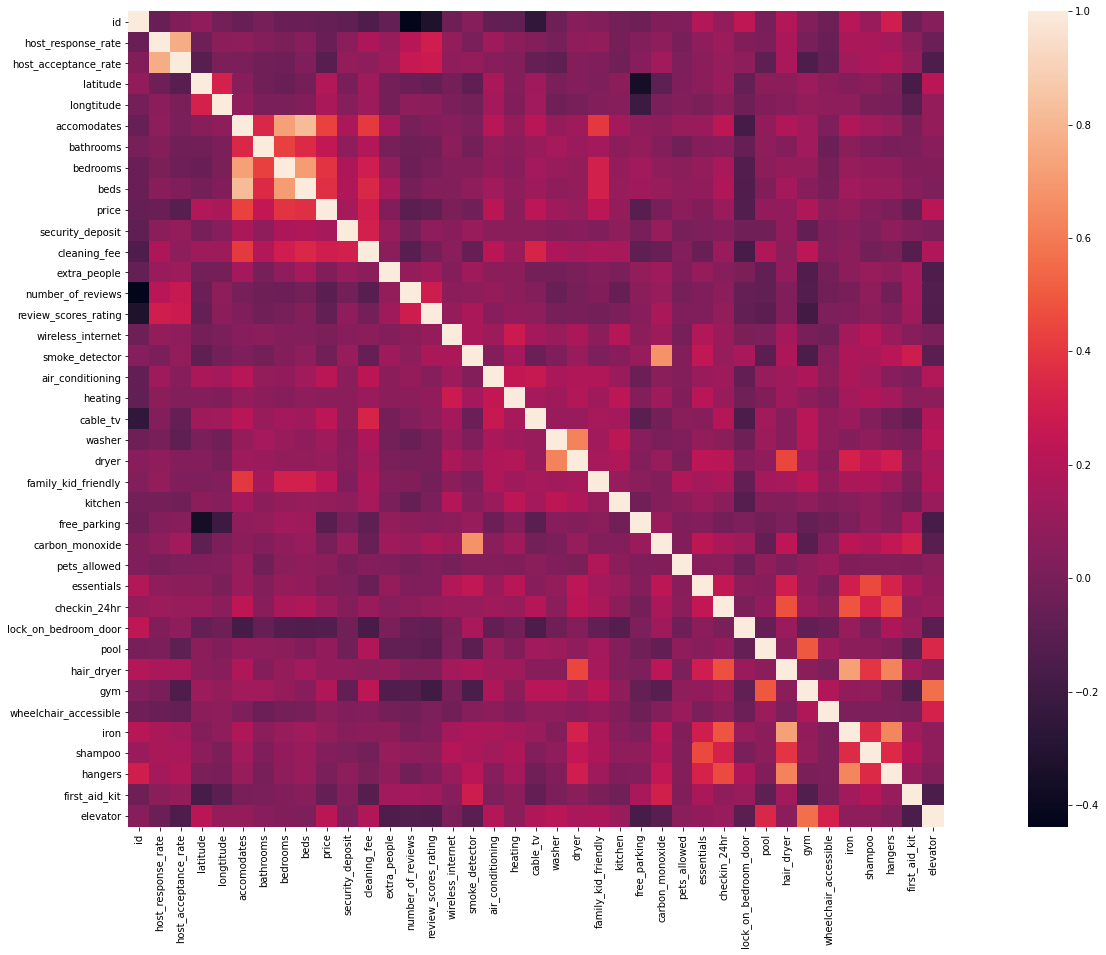

In [48]:
corrmat = airbnb_df.corr()
f, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corrmat, vmax=1, square=True)

In [49]:
df_corr = airbnb_df.corr()

In [50]:
df_corr = df_corr.rename_axis(None).rename_axis(None, axis=1)
df_corr

,id,host_response_rate,host_acceptance_rate,latitude,longtitude,accomodates,bathrooms,bedrooms,beds,price,...,lock_on_bedroom_door,pool,hair_dryer,gym,wheelchair_accessible,iron,shampoo,hangers,first_aid_kit,elevator
id,1.000000,-0.046041,0.032548,0.089842,-0.010871,-0.050574,-0.004476,-0.049581,-0.046199,-0.059198,...,0.241206,0.002085,0.191445,0.036582,-0.038687,0.212156,0.115823,0.299509,-0.034668,0.050567
host_response_rate,-0.046041,1.000000,0.765951,-0.033066,0.063412,0.078182,0.040202,0.014569,0.053758,-0.046772,...,0.032188,0.005796,0.167285,0.000241,-0.047734,0.163932,0.171433,0.143949,0.057341,-0.039385
host_acceptance_rate,0.032548,0.765951,1.000000,-0.102430,0.016981,0.006819,-0.022484,-0.030428,0.027706,-0.105642,...,0.074531,-0.084579,0.161455,-0.145214,-0.058032,0.139310,0.161567,0.183075,0.095217,-0.141946
latitude,0.089842,-0.033066,-0.102430,1.000000,0.319327,0.053818,-0.017490,-0.046416,-0.010243,0.196270,...,-0.062016,0.061981,0.062710,0.122413,0.063526,0.043470,0.063825,0.014756,-0.165799,0.220872
longtitude,-0.010871,0.063412,0.016981,0.319327,1.000000,0.083658,0.008591,0.014763,0.033054,0.165621,...,-0.034234,0.028391,0.049029,0.090049,0.075355,0.076639,0.014396,0.005581,-0.097962,0.097699
accomodates,-0.050574,0.078182,0.006819,0.053818,0.083658,1.000000,0.346950,0.724401,0.815186,0.437756,...,-0.176659,0.089158,0.186705,0.137461,0.021197,0.187452,0.138336,0.105385,0.004847,0.096345
bathrooms,-0.004476,0.040202,-0.022484,-0.017490,0.008591,0.346950,1.000000,0.428332,0.351544,0.248695,...,-0.058238,0.076855,0.042144,0.137854,-0.041818,0.057927,0.024646,0.000556,0.007795,0.054995
bedrooms,-0.049581,0.014569,-0.030428,-0.046416,0.014763,0.724401,0.428332,1.000000,0.709336,0.382418,...,-0.123998,0.065518,0.098918,0.098928,-0.006244,0.104631,0.087475,0.083190,0.033705,0.031817
beds,-0.046199,0.053758,0.027706,-0.010243,0.033054,0.815186,0.351544,0.709336,1.000000,0.371407,...,-0.134696,0.032250,0.146041,0.052736,-0.002135,0.138197,0.115341,0.111298,0.052343,0.022385
price,-0.059198,-0.046772,-0.105642,0.196270,0.165621,0.437756,0.248695,0.382418,0.371407,1.000000,...,-0.131305,0.088422,0.084464,0.184463,0.060911,0.094305,0.042783,0.009880,-0.060284,0.221503


In [51]:
df_corr1 = df_corr.stack().reset_index()
#set column names
df_corr1.columns = ['Feature_A','Feature_B','Correlation']
print (df_corr1)

     Feature_A             Feature_B  Correlation
0           id                    id     1.000000
1           id    host_response_rate    -0.046041
2           id  host_acceptance_rate     0.032548
3           id              latitude     0.089842
4           id            longtitude    -0.010871
...        ...                   ...          ...
1516  elevator                  iron     0.076078
1517  elevator               shampoo     0.079026
1518  elevator               hangers     0.038501
1519  elevator         first_aid_kit    -0.154514
1520  elevator              elevator     1.000000

[1521 rows x 3 columns]


In [52]:
df_corr1.to_csv(r'Resources\Pearson_Corr_Data.csv')

In [53]:
corrmat_2 = corrmat['price'].sort_values(ascending=False).head(12).to_frame()

cm = sns.light_palette("purple", as_cmap=True)

corrmat_3 = corrmat_2.style.background_gradient(cmap=cm)
corrmat_3

,price
price,1.000000
accomodates,0.437756
bedrooms,0.382418
beds,0.371407
cleaning_fee,0.299320
bathrooms,0.248695
cable_tv,0.226981
family_kid_friendly,0.226539
elevator,0.221503
air_conditioning,0.220434
